# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import os                              # Interact with the operating system.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib                      # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
from time import time                  # Calculate training time.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "titanic_data")
print('Data files in this project:', os.listdir(DATA_PATH))
data_raw_file = os.path.join(DATA_PATH, 'train.csv')
data_raw = pd.read_csv(data_raw_file)
print('Loaded {} records from {}.'.format(len(data_raw), data_raw_file))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- Matplotlib 3.0.3
- scikit-learn 0.20.3

Data files in this project: ['train.csv', 'test.csv']
Loaded 891 records from ./titanic_data/train.csv.


# Get acquainted with the dataset #

In [2]:
print(data_raw.info())      # View data types and see if there are missing entries.
data_raw.head(10)           # View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Examine a general summary of statistics #

In [3]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe())

       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53   1.10   0.81  49.69
min           1.00      0.00    1.00   0.42   0.00   0.00   0.00
25%         223.50      0.00    2.00  20.12   0.00   0.00   7.91
50%         446.00      0.00    3.00  28.00   0.00   0.00  14.45
75%         668.50      1.00    3.00  38.00   1.00   0.00  31.00
max         891.00      1.00    3.00  80.00   8.00   6.00 512.33


# Use stacked bar visualization to show survival numbers

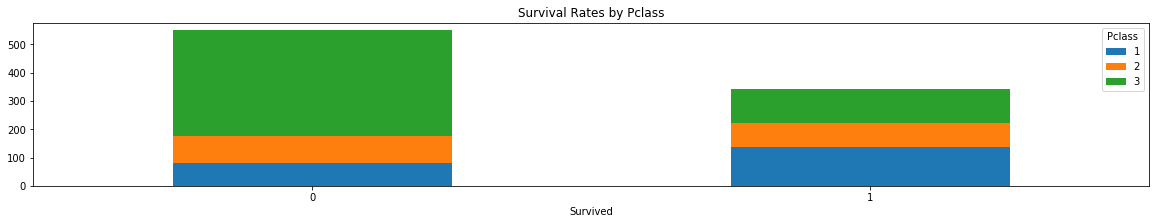

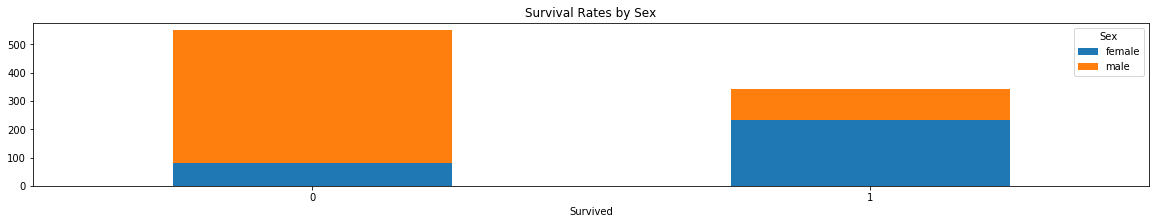

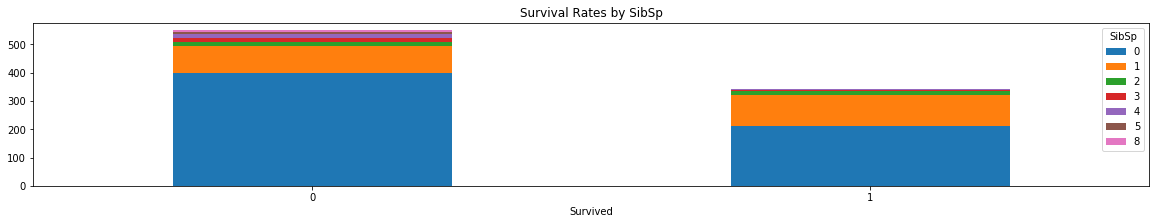

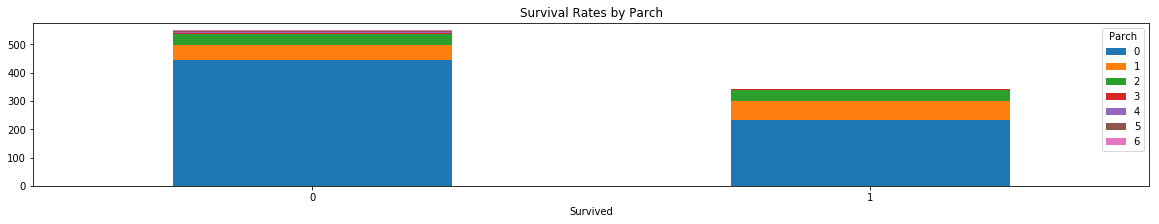

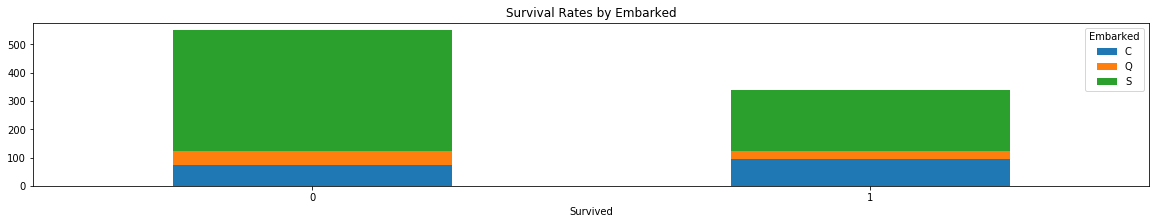

In [4]:
feature_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in feature_list:
    plot_set = data_raw.groupby([feature, 'Survived'])
    plot_set = plot_set.size().reset_index()
    plot_set = plot_set.pivot(columns=feature,index='Survived',values=0)
    plot_set.plot(kind='bar', stacked=True, rot=0, figsize=(20,3)).set_title(f'Survival Rates by {feature}');

# Look for relationships between survival, age, and sex

(0, 20)

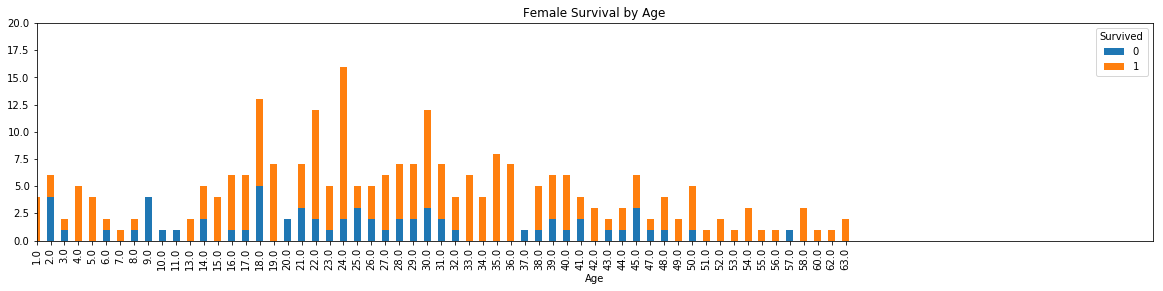

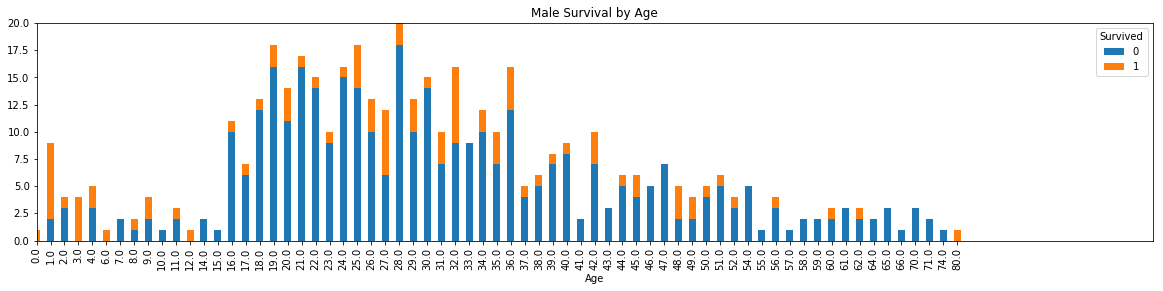

In [5]:
survived = 'Survived'
perished = 'Perished'

men = data_raw[data_raw['Sex']=='male'].round(0)
women = data_raw[data_raw['Sex']=='female'].round(0)

women_plot = women.groupby(['Survived','Age']).size().reset_index().pivot(columns='Survived', index='Age', values=0)
ax = women_plot.plot(kind='bar', stacked=True, figsize=(20,4), title='Female Survival by Age')
ax.set_xlim(0, 80)
ax.set_ylim(0, 20)

men_plot = men.groupby(['Survived','Age']).size().reset_index().pivot(columns='Survived', index='Age', values=0)
ax = men_plot.plot(kind='bar', stacked=True, figsize=(20,4), title='Male Survival by Age')
ax.set_xlim(0, 80)
ax.set_ylim(0, 20)

# Identify columns with missing values

In [6]:
print('Number of missing values:\n{}\n'.format(data_raw.isnull().sum()))

Number of missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



# Split the datasets

In [7]:
# Separate training and test sets already exist.
# A validation set will be split off from the training sets.

from sklearn.model_selection import train_test_split

# 'Survived' is the dependent variable (value to be predicted), so it will be
# removed from the training data and put into a separate DataFrame for labels.
label_columns = ['Survived']

training_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Split the training and validation datasets and their labels.
X_train, X_val, y_train, y_val = train_test_split(data_raw[training_columns],
                                                                            data_raw[label_columns],
                                                                            random_state = 1912)

# Compare the number of rows and columns in the original data to the training and validation sets.
print(f'Original set:        {data_raw.shape}')
print('------------------------------')
print(f'Training features:   {X_train.shape}')
print(f'Validation features: {X_val.shape}')
print(f'Training labels:     {y_train.shape}')
print(f'Validation labels:   {y_val.shape}')

Original set:        (891, 12)
------------------------------
Training features:   (668, 11)
Validation features: (223, 11)
Training labels:     (668, 1)
Validation labels:   (223, 1)


# Identify columns that should be modified or deleted from the training set

In [8]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
617,618,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
242,243,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
82,83,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
398,399,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S


# Determine how to handle ticket values

In [9]:
data_raw.Ticket.sort_values().unique()

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

# Identify all personal titles and embarked port codes

In [10]:
title = data_raw['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
print('Titles: ', title.unique())

embarked_loc = data_raw['Embarked']
print('Embarked locations: ', embarked_loc.unique())

Titles:  ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Embarked locations:  ['S' 'C' 'Q' nan]


# Perform common preparation on the training and validation sets

In [11]:
# Perform common cleaning and feature engineering tasks on datasets.
def prep_dataset(dataset):
    
    print('Before prep:\n\n{}\n'.format(dataset.isnull().sum())) 
    
    # PROVIDE MISSING VALUES
    
    # Fill missing Age values with the median age.
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    # Fill missing Fare values with the median fare.
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

    # Fill missing Embarked values with the mode.
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    
    
    # FEATURE ENGINEERING
    
    # Size of family and whether passenger is traveling alone.
    size_of_family = dataset['SibSp'] + dataset['Parch'] + 1        
    dataset['SizeOfFamily'] = size_of_family
        
    # Extract the title from the passenger's name.
    title = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['Title'] = title
    
    
    # CONVERT CATEGORICAL VALUES TO NUMERIC ENCODINGS
    
    title_encode = {}
    count = 1
    for i in title.unique():
        title_encode.update({i: count})
        count += 1
    
    sex_encode = {'female': 1, 'male': 2}
    
    embarked_encode = {'S':1, 'C':2, 'Q':3}
    
    dataset['SexEncoding'] = dataset['Sex'].map(sex_encode)
    dataset['EmbarkedEncoding'] = dataset['Embarked'].map(embarked_encode)
    
    dataset['TitleEncoding'] = dataset['Title'].map(title_encode)
    dataset['TitleEncoding'].fillna(dataset['TitleEncoding'].mode()[0], inplace = True)
        
    print('After prep:\n\n{}\n'.format(dataset.isnull().sum()))

    return dataset

print('---- TRAINING -----')
X_train = prep_dataset(X_train.copy())

print('---- VALIDATION -----')
X_val = prep_dataset(X_val.copy())

---- TRAINING -----
Before prep:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            126
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          518
Embarked         2
dtype: int64

After prep:

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               518
Embarked              0
SizeOfFamily          0
Title                 0
SexEncoding           0
EmbarkedEncoding      0
TitleEncoding         0
dtype: int64

---- VALIDATION -----
Before prep:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             51
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          169
Embarked         0
dtype: int64

After prep:

PassengerId           0
Pclass                0
Name        

# Preview current training data

In [12]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SizeOfFamily,Title,SexEncoding,EmbarkedEncoding,TitleEncoding
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,Mr,2,1,1
617,618,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S,2,Mrs,1,1,2
242,243,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S,1,Mr,2,1,1
82,83,3,"McDermott, Miss. Brigdet Delia",female,27.5,0,0,330932,7.7875,NaN,Q,1,Miss,1,3,3
398,399,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,1,Dr,2,1,4


# Drop columns that won't be used for training

In [13]:
# Drop unused columns from datasets.
def drop_unused(dataset):
    
    print('Columns before drop:\n\n{}\n'.format(list(dataset.columns)))
        
    dataset = dataset.drop(['PassengerId'], axis=1)
    dataset = dataset.drop(['Cabin'], axis=1)
    dataset = dataset.drop(['Ticket'], axis=1)
    dataset = dataset.drop(['Name'], axis=1)

    # These have been replaced with numeric codes.
    dataset = dataset.drop(['Title'], axis=1)
    dataset = dataset.drop(['Sex'], axis=1)
    dataset = dataset.drop(['Embarked'], axis=1)
    
    print('Columns after drop:\n\n{}\n'.format(list(dataset.columns)))
    return dataset

print('---- TRAINING -----')
X_train = drop_unused(X_train.copy())

print('--- VALIDATION ----')
X_val = drop_unused(X_val.copy())

---- TRAINING -----
Columns before drop:

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SizeOfFamily', 'Title', 'SexEncoding', 'EmbarkedEncoding', 'TitleEncoding']

Columns after drop:

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'SizeOfFamily', 'SexEncoding', 'EmbarkedEncoding', 'TitleEncoding']

--- VALIDATION ----
Columns before drop:

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SizeOfFamily', 'Title', 'SexEncoding', 'EmbarkedEncoding', 'TitleEncoding']

Columns after drop:

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'SizeOfFamily', 'SexEncoding', 'EmbarkedEncoding', 'TitleEncoding']



In [14]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,SizeOfFamily,SexEncoding,EmbarkedEncoding,TitleEncoding
439,2,31.0,0,0,10.5000,1,2,1,1
617,3,26.0,1,0,16.1000,2,1,1,2
242,2,29.0,0,0,10.5000,1,2,1,1
82,3,27.5,0,0,7.7875,1,1,3,3
398,2,23.0,0,0,10.5000,1,2,1,4


# Create a logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='sag', C = 0.05, max_iter = 10000)
start = time()
log_reg.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start) * 1000

# Score using the validation data.
score = log_reg.score(X_val, y_val)

print('Logistic regression model took {:.2f} milliseconds to fit.'.format(train_time))
print('Score on validation set: {:.0f}%'.format(score * 100))

Logistic regression model took 305.65 milliseconds to fit.
Score on validation set: 78%


In [16]:
# Use validation set to evaluate.
results_comparison = X_val.copy()
results_comparison['PredictedSurvival'] = log_reg.predict(X_val)
results_comparison['ActualSurvival'] = y_val.copy()
results_comparison['ProbPerished'] = np.round(log_reg.predict_proba(X_val)[:, 0] * 100, 2)
results_comparison['ProbSurvived'] = np.round(log_reg.predict_proba(X_val)[:, 1] * 100, 2)

# View examples of the predictions compared to actual survival.
results_comparison.head(20)

,Pclass,Age,SibSp,Parch,Fare,SizeOfFamily,SexEncoding,EmbarkedEncoding,TitleEncoding,PredictedSurvival,ActualSurvival,ProbPerished,ProbSurvived
400,3,39.00,0,0,7.9250,1,2,1,1,0,1,83.00,17.00
450,2,36.00,1,2,27.7500,4,2,1,1,0,0,82.71,17.29
846,3,30.25,8,2,69.5500,11,2,1,1,0,0,97.52,2.48
516,2,34.00,0,0,10.5000,1,1,1,2,0,1,51.99,48.01
42,3,30.25,0,0,7.8958,1,2,2,1,0,0,78.61,21.39
247,2,24.00,0,2,14.5000,3,1,1,2,0,1,53.42,46.58
22,3,15.00,0,0,8.0292,1,1,3,3,1,1,35.46,64.54
867,1,31.00,0,0,50.4958,1,2,1,1,0,0,63.11,36.89
410,3,30.25,0,0,7.8958,1,2,1,1,0,0,82.60,17.40
252,1,62.00,0,0,26.5500,1,2,1,1,0,0,71.82,28.18


# Create a *k*-nearest neighbor model

In [17]:
from math import sqrt

# Use bootstrapping to find ideal k value.
k_num = round(sqrt(X_train.shape[0]))

# Make k odd if it is even.
if k_num % 2 == 0:
    k_num += 1

from sklearn.neighbors import KNeighborsClassifier

# Train model.
knn = KNeighborsClassifier(n_neighbors = k_num) 
start = time()
knn.fit(X_train, np.ravel(y_train))  
end=time()
train_time = (end - start) * 1000

# Score using the validation data.
score = knn.score(X_val, y_val)

print('Value of k: {}'.format(k_num))
print('KNN model took {:.2f} milliseconds to fit.'.format(train_time))
print('Score on validation set: {:.0f}%'.format(score * 100))

Value of k: 27
KNN model took 2.20 milliseconds to fit.
Score on validation set: 76%


In [18]:
# Use validation set to evaluate.
results_comparison = X_val.copy()
results_comparison['PredictedSurvival'] = knn.predict(X_val)
results_comparison['ActualSurvival'] = y_val.copy()
results_comparison['ProbPerished'] = np.round(knn.predict_proba(X_val)[:, 0] * 100, 2)
results_comparison['ProbSurvived'] = np.round(knn.predict_proba(X_val)[:, 1] * 100, 2)

# View examples of the predictions compared to actual survival.
results_comparison.head(20)

,Pclass,Age,SibSp,Parch,Fare,SizeOfFamily,SexEncoding,EmbarkedEncoding,TitleEncoding,PredictedSurvival,ActualSurvival,ProbPerished,ProbSurvived
400,3,39.00,0,0,7.9250,1,2,1,1,0,1,92.59,7.41
450,2,36.00,1,2,27.7500,4,2,1,1,0,0,51.85,48.15
846,3,30.25,8,2,69.5500,11,2,1,1,0,0,51.85,48.15
516,2,34.00,0,0,10.5000,1,1,1,2,0,1,66.67,33.33
42,3,30.25,0,0,7.8958,1,2,2,1,0,0,70.37,29.63
247,2,24.00,0,2,14.5000,3,1,1,2,0,1,62.96,37.04
22,3,15.00,0,0,8.0292,1,1,3,3,0,1,51.85,48.15
867,1,31.00,0,0,50.4958,1,2,1,1,1,0,40.74,59.26
410,3,30.25,0,0,7.8958,1,2,1,1,0,0,70.37,29.63
252,1,62.00,0,0,26.5500,1,2,1,1,0,0,70.37,29.63


# Use the logistic regression model to make predictions on the test data

In [19]:
# Read the test dataset.
X_test_file = os.path.join(DATA_PATH, 'test.csv')
X_test_raw = pd.read_csv(X_test_file)
print('Loaded {} records from {}\n'.format(len(X_test_raw), X_test_file))

Loaded 418 records from ./titanic_data/test.csv



In [20]:
# Prepare the dataset and drop unneeded columns.
print('Preparing test data for prediction\n')
X_test = prep_dataset(X_test_raw.copy())
X_test = drop_unused(X_test.copy())

Preparing test data for prediction

Before prep:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

After prep:

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               327
Embarked              0
SizeOfFamily          0
Title                 0
SexEncoding           0
EmbarkedEncoding      0
TitleEncoding         0
dtype: int64

Columns before drop:

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'SizeOfFamily', 'Title', 'SexEncoding', 'EmbarkedEncoding', 'TitleEncoding']

Columns after drop:

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'SizeOfFamily', 'SexEncoding', 'EmbarkedEncodi

In [21]:
# Show example predictions with the original test data.
results_log_reg = X_test_raw.copy()
results_log_reg['PredictedSurvival'] = log_reg.predict(X_test)
results_log_reg['ProbPerished'] = np.round(log_reg.predict_proba(X_test)[:, 0] * 100, 2)
results_log_reg['ProbSurvived'] = np.round(log_reg.predict_proba(X_test)[:, 1] * 100, 2)
results_log_reg.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PredictedSurvival,ProbPerished,ProbSurvived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,74.29,25.71
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,68.01,31.99
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,70.70,29.30
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,82.30,17.70
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,66.31,33.69
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,81.58,18.42
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,36.70,63.30
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,80.96,19.04
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,51.48,48.52
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,88.19,11.81
